# Example 1. Authorizing an application to access Twitter account data

This code was shared with me by *Randy Paffenroth* at *Worcester Polytechnic Institute* (fun note Randy and I almost overlapped at Boston University, he finished there a year before I arrived). Because it is not my own, I will not include it in our textbook and will only have it in our Github page for the course.

I am including it in our class because **API** (for Application Program Interface) are common tools used particularly by webservices like Twitter, Zillow, Google (which has many different APIs), and really anyone that wants to set up a way for programs to interact with their service. Many APIs are proprietary but the odds are very good that as a data scientist or mathematician you may end up working on a project that is using one to interface with a client or contractor's service, or for that matter even with your own companies service. 

To access the Twitter API you need to go to [http://dev.twitter.com/apps/new](http://dev.twitter.com/apps/new) to sign up for a developer account and to request the creation of a new app. You will need to answer some questions about what you plan to do with your app and make some promises about what you will not do. It is not an automatic process and does take some time. It is important that you honor the promises you have made. The app you get will provide you with some keys and tokens that are used for providiing your access. I suggest that you not share this with anyone. They have been removed from the code below and so you will not be able to execute this code without putting them in.

The free Twitter API has some restrictions on how much data you can scrape. A nice programing exercise is to write a program that would be able to collect more than this limit in data by spacing the requests out sufficiently far in time.

So with those preliminaries, lets take a look at the kind of data we can pull from Twitter and the preliminary analysis we can get from it.

In [1]:
import twitter
# Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

# Insert the Keys and Tokens as strings

CONSUMER_KEY = ''
CONSUMER_SECRET =''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

# Example 2. Retrieving trends

In [3]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

for i in range(5):
    print(world_trends[0]['trends'][i]['query'])

%23ITVDebate
Poch
Spurs
Tottenham
Mourinho


In [4]:
for i in range(5):
    print(us_trends[0]['trends'][i]['query'])

Poch
Lizzo
Vindman
%23WhyImThankfulForPizza
%23DevinNunesIsAnIdiot


# Example 3. Displaying API responses as pretty-printed JSON

In [5]:
import json

#print(json.dumps(world_trends, indent=1))
print(json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "Poch",
    "url": "http://twitter.com/search?q=Poch",
    "promoted_content": null,
    "query": "Poch",
    "tweet_volume": 67010
   },
   {
    "name": "Lizzo",
    "url": "http://twitter.com/search?q=Lizzo",
    "promoted_content": null,
    "query": "Lizzo",
    "tweet_volume": 48747
   },
   {
    "name": "Vindman",
    "url": "http://twitter.com/search?q=Vindman",
    "promoted_content": null,
    "query": "Vindman",
    "tweet_volume": 1470449
   },
   {
    "name": "#WhyImThankfulForPizza",
    "url": "http://twitter.com/search?q=%23WhyImThankfulForPizza",
    "promoted_content": null,
    "query": "%23WhyImThankfulForPizza",
    "tweet_volume": null
   },
   {
    "name": "#DevinNunesIsAnIdiot",
    "url": "http://twitter.com/search?q=%23DevinNunesIsAnIdiot",
    "promoted_content": null,
    "query": "%23DevinNunesIsAnIdiot",
    "tweet_volume": 65910
   },
   {
    "name": "#askjaypark",
    "url": "http://twitter.com/search?q=%23askjaypa

# Example 4. Computing the intersection of two sets of trends

In [6]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#WhyImThankfulForPizza', 'Mourinho', '#askjaypark', 'Jump Force', 'GOTY', '#BTSBreakTheInternet', 'Control', '#YIAYrewind', '#ThankYouPatrons', 'Lizzo', 'Levy', '#TheGameAwards', '#KSIDLT', 'Vindman', 'Poch', 'Ari Lennox', 'Purple Heart', '#COYS', 'Lisa Frank', '#DevinNunesIsAnIdiot', '#ITVDebate'}


# Example 5. Collecting search results

In [14]:
#  Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.
import json

q = 'University of Northern Colorado' 

count = 1000

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[1], indent=4))


Length of statuses 100
Length of statuses 200
Length of statuses 200
{
    "created_at": "Tue Nov 19 08:13:46 +0000 2019",
    "id": 1196703098128912384,
    "id_str": "1196703098128912384",
    "text": "RT @J_WRIGHT08: Well it's officially official.. I've signed to play D1 baseball at The University of Northern Colorado.. Now the work begin\u2026",
    "truncated": false,
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [
            {
                "screen_name": "J_WRIGHT08",
                "name": "jaxon wright",
                "id": 839532851087491075,
                "id_str": "839532851087491075",
                "indices": [
                    3,
                    14
                ]
            }
        ],
        "urls": []
    },
    "metadata": {
        "iso_language_code": "en",
        "result_type": "recent"
    },
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
   

# Example 6. Extracting text, screen names, and hashtags from tweets

In [15]:
import time


status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "A prime #retail center in Northern Colorado sold for $23.75 million, which equates to a price of $347.56 per square\u2026 https://t.co/12T9UqbMbR",
 "RT @J_WRIGHT08: Well it's officially official.. I've signed to play D1 baseball at The University of Northern Colorado.. Now the work begin\u2026",
 "RT @chasejohansen2: Huge thank you to @UNCCoachCollins and the rest of the coaching staff for the offer to play at The University of Northe\u2026",
 "RT @J_WRIGHT08: Well it's officially official.. I've signed to play D1 baseball at The University of Northern Colorado.. Now the work begin\u2026",
 "RT @HastingsTigers: Congratulations to Damen Pape for signing with the University of Northern Colorado for Wrestling.\n\n#HastingsTigers #eve\u2026"
]
[
 "J_WRIGHT08",
 "chasejohansen2",
 "UNCCoachCollins",
 "J_WRIGHT08",
 "HastingsTigers"
]
[
 "retail",
 "HastingsTigers",
 "WVU",
 "AGTG",
 "UNCommon"
]
[
 "A",
 "prime",
 "#retail",
 "center",
 "in"
]


# Example 7. Creating a basic frequency distribution from the words in tweets

In [16]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10

[('of', 202), ('to', 196), ('the', 164), ('RT', 163), ('University', 158), ('Northern', 149), ('my', 95), ('Colorado', 77), ('offer', 70), ('for', 66)]
[('Dexter__78', 35), ('Noevart', 19), ('Tmatthews16', 14), ('Brookeballard__', 14), ('trentonscott072', 13), ('AlerusCenter', 12), ('HastingsTigers', 11), ('Grant_Swenson_4', 8), ('Coach_Wikre', 8), ('Sea_Eagel2', 7)]
[('UNCommon', 56), ('GoUNCBears', 56), ('BigSkyFB', 54), ('AGTG', 20), ('HastingsTigers', 12), ('retail', 1), ('WVU', 1), ('uncgreeley', 1), ('greality', 1), ('bowtieben', 1)]


# Example 8. Calculating lexical diversity for tweets

In [17]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.12384749563917269
0.19617224880382775
0.08530805687203792
20.065


#  Example 9. Plotting frequencies of words

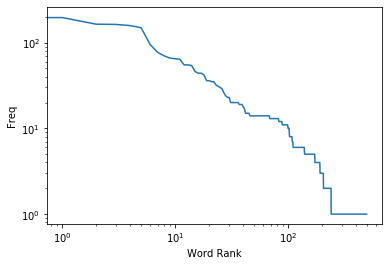

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


word_counts = sorted(Counter(words).values(), reverse=True)



plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");